In [56]:
library(randomForest)
library(pROC)
library(FactoMineR)
library(gplots)
library(e1071)
library(keras)
library(caret)
getwd()

[1] "C:/Users/Rishabh/Desktop/Rminor"

In [2]:
data<-read.csv('fer2013.csv')
print(head(data))

  emotion
1       0
2       0
3       2
4       4
5       6
6       2
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [3]:
print(nrow(data))
print(ncol(data))
summary(data$Usage)

[1] 35887
[1] 3


PrivateTest  PublicTest    Training 
       3589        3589       28709

In [4]:
train_set=subset(data,data$Usage=='Training')
valid_set=subset(data,data$Usage=='PublicTest')
test_set=subset(data,data$Usage=='PrivateTest')

In [5]:
emotion_labels<-list("Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral")
num_classes=length(emotion_labels)
print(num_classes)

[1] 7


In [6]:
depth=1
height=48
width=height

Warning message in normalizePath(path.expand(path), winslash, mustWork):
"path[1]="C:\Users\Rishabh\ANACON~1\envs\rstudio/python.exe": The system cannot find the file specified"

[[1]]
[1] "Angry"



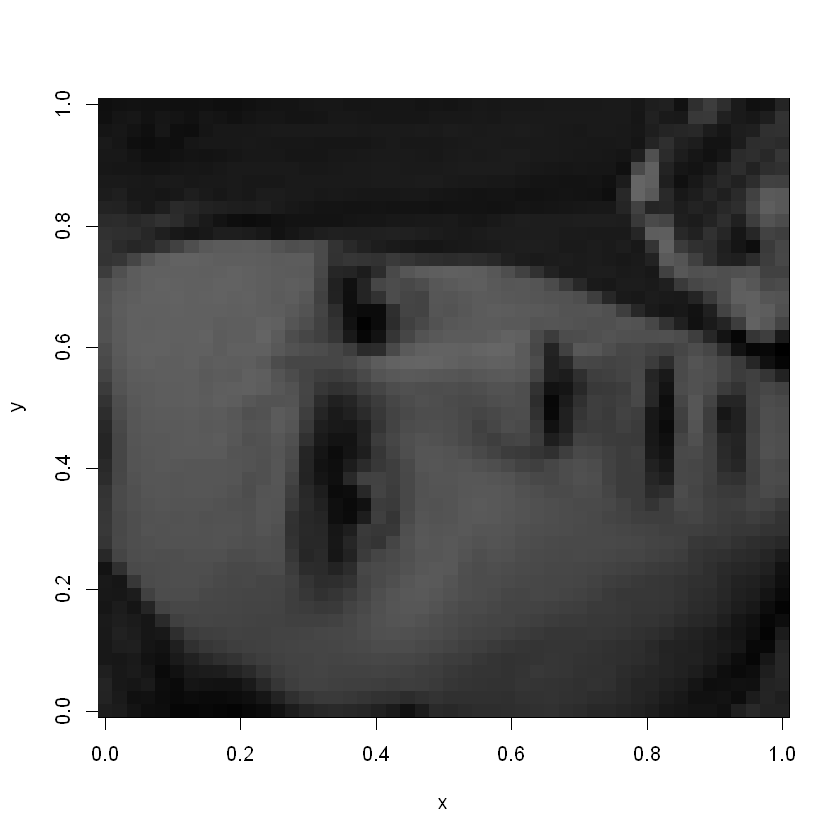

In [7]:
a<-as.vector(train_set$pixels[1])
as.numeric(strsplit(a,split=" ")[[1]])->a
a<-as.vector(a)
a<-array_reshape(a,c(48,48))
x <- seq(0, 1, length = nrow(a))
y <- seq(0, 1, length = ncol(a))
print(emotion_labels[train_set$emotion[1]+1])
image(x, y, a, col = grey(seq(0, 0.4, length = 256)))

In [8]:
trainx<-as.vector(train_set$pixels)
testx=as.vector(test_set$pixels)
validx=as.vector(valid_set$pixels)
length(validx)

[1] 3589

In [9]:
testx<-paste(testx,collapse=" ")
as.numeric(strsplit(testx,split=" ")[[1]])->testx
testx<-array_reshape(testx,c(3589,48,48,1))

In [10]:
trainx<-paste(trainx,collapse=" ")
as.numeric(strsplit(trainx,split=" ")[[1]])->trainx
trainx<-array_reshape(trainx,c(28709,48,48,1))

In [11]:
validx<-paste(validx,collapse=" ")
as.numeric(strsplit(validx,split=" ")[[1]])->validx
validx<-array_reshape(validx,c(3589,48,48,1))

In [12]:
tx<-trainx[1:3000,,,]
tx<-array_reshape(tx,c(3000,48,48,1))
dim(trainx)
dim(tx)
dim(testx)
dim(validx)

[1] 28709    48    48     1

[1] 3000   48   48    1

[1] 3589   48   48    1

[1] 3589   48   48    1

In [13]:
validy<-valid_set$emotion
validy<-to_categorical(validy,num_classes)
trainy<-train_set$emotion
trainy<-to_categorical(trainy,num_classes)
testy<-test_set$emotion
testy<-to_categorical(testy,num_classes)

In [14]:
ty<-train_set$emotion
ty<-ty[1:3000]
ty<-to_categorical(ty,num_classes)
dim(trainy)
dim(ty)
dim(testy)

[1] 28709     7

[1] 3000    7

[1] 3589    7

In [152]:
checkpoint_dir <- "checkpoints"
dir.create(checkpoint_dir, showWarnings = FALSE)
filepath <- file.path(checkpoint_dir, "model.hdf5")
cp_callback <- callback_model_checkpoint(
  filepath = filepath,
  save_weights_only = TRUE,
  verbose = 1
)
model<-keras_model_sequential()
model %>%
            layer_conv_2d(filters=64,
                          kernel_size=c(3,1),
                          padding='same',
                          input_shape=c(48,48,1))%>%
            layer_conv_2d(filters=64,
                          kernel_size=c(1,3),
                          padding='same')%>%
            layer_batch_normalization()%>%
            layer_activation('relu')%>%
            layer_max_pooling_2d(pool_size=c(2,2),
                                 padding='same')%>%
            layer_dropout(rate=0.25)%>%

            layer_conv_2d(filters=128,
                          kernel_size=c(3,1),
                          padding='same')%>%
            layer_conv_2d(filters=128,
                          kernel_size=c(1,3),
                          padding='same')%>%
            layer_batch_normalization()%>%
            layer_activation('relu')%>%
            layer_max_pooling_2d(pool_size=c(2,2),
                                 padding='same')%>%
            layer_dropout(rate=0.25)%>%

            layer_conv_2d(filters=256,
                          kernel_size=c(3,1),
                          padding='same')%>%
            layer_conv_2d(filters=256,
                          kernel_size=c(1,3),
                          padding='same')%>%
            layer_batch_normalization()%>%
            layer_activation('relu')%>%
            layer_max_pooling_2d(pool_size=c(2,2),
                                 padding='same')%>%
            layer_dropout(rate=0.25)%>%

            layer_conv_2d(filters=512,
                          kernel_size=c(3,1),
                          padding='same')%>%
            layer_conv_2d(filters=512,
                          kernel_size=c(1,3),
                          padding='same')%>%
            layer_batch_normalization()%>%
            layer_activation('relu')%>%
            layer_max_pooling_2d(pool_size=c(2,2),
                                 padding='same')%>%
            layer_dropout(rate=0.25)%>%

            layer_flatten()%>%

            layer_dense(units=512)%>%
            layer_batch_normalization()%>%
            layer_activation('relu')%>%
            layer_dropout(rate=0.25)%>%

            layer_dense(units=256)%>%
            layer_batch_normalization()%>%
            layer_activation('relu')%>%
            layer_dropout(rate=0.25)%>%

            layer_dense(units=7)%>%
            layer_activation('softmax')%>%
            compile(loss='categorical_crossentropy',
                    optimizer=optimizer_adam(),
                    metrics=c('accuracy'))

In [48]:
summary(model)

________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d_9 (Conv2D)                   (None, 48, 48, 64)              256         
________________________________________________________________________________
conv2d_10 (Conv2D)                  (None, 48, 48, 64)              12352       
________________________________________________________________________________
batch_normalization_7 (BatchNormali (None, 48, 48, 64)              256         
________________________________________________________________________________
activation_8 (Activation)           (None, 48, 48, 64)              0           
________________________________________________________________________________
max_pooling2d_5 (MaxPooling2D)      (None, 24, 24, 64)              0           
________________________________________________________________________________
dropout_7 (Dropout)         

In [49]:
b_size=32
num_epochs=25

In [51]:
history<- model%>%
        fit(trainx,
            trainy,
            verbose=1,
            epochs=num_epochs,
            batch_size=b_size,
            shuffle=TRUE,
           validation_data=list(validx,validy),
           callbacks = list(cp_callback))

In [15]:
#svm model
trainsvmx<-as.vector(train_set$pixels)
trainsvmx<-paste(trainsvmx,collapse=" ")
as.numeric(strsplit(trainsvmx,split=" ")[[1]])->trainsvmx

In [16]:
trainsvmx<-array_reshape(trainsvmx,c(28709,2304))
dim(trainsvmx)

[1] 28709  2304

In [17]:
pc<-prcomp(trainsvmx,center=TRUE,scale.=TRUE)

In [30]:
dim(pc$x)

[1] 28709  2304

In [18]:
trainnew<-predict(pc,trainsvmx)
trainnew<-trainnew[,1:80]
dim(trainnew)

[1] 28709    80

In [26]:
print(trainnew[1,])

       PC1        PC2        PC3        PC4        PC5 
 -6.843495 -10.887535 -10.387212   9.447484   7.004330 


In [19]:
trainsvmy<-train_set$emotion
length(trainsvmy)

[1] 28709

In [20]:
testsvmx<-as.vector(test_set$pixels)
testsvmx<-paste(testsvmx,collapse=" ")
as.numeric(strsplit(testsvmx,split=" ")[[1]])->testsvmx
testsvmx<-array_reshape(testsvmx,c(3589,2304))
pct<-prcomp(testsvmx,center=TRUE,scale.=TRUE)
testnew<-predict(pct,testsvmx)
testnew<-testnew[,1:80]
dim(testnew)

[1] 3589   80

In [53]:
testsvmy<-test_set$emotion
length(testsvmy)

[1] 3589

In [22]:
svmmodel<-svm(trainnew,trainsvmy,type='C',kernel='linear')

In [81]:
pred<-predict(svmmodel,testnew)
testsvmy<-as.factor(testsvmy)
conf<-confusionMatrix(pred,testsvmy)
conf

Confusion Matrix and Statistics

          Reference
Prediction   0   1   2   3   4   5   6
         0  40   8  48  63  48  13  36
         1   0   0   0   0   0   0   0
         2  40   8  36  54  52  25  60
         3 213  19 206 528 236 120 241
         4  78   7  89 102 105  88  90
         5  40   4  45  52  63  69  69
         6  80   9 104  80  90 101 130

Overall Statistics
                                          
               Accuracy : 0.253           
                 95% CI : (0.2388, 0.2676)
    No Information Rate : 0.2449          
    P-Value [Acc > NIR] : 0.1345          
                                          
                  Kappa : 0.0739          
                                          
 Mcnemar's Test P-Value : <2e-16          

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3 Class: 4 Class: 5
Sensitivity           0.08147  0.00000  0.06818   0.6007  0.17677  0.16587
Specificity           0.93028  1.00000  0.92192   0.618

Warning message in heatmap.2(as.matrix(t), symm = TRUE, scale = "column", Rowv = NA, :
"Discrepancy: Rowv is FALSE, while dendrogram is `both'. Omitting row dendogram."Warning message in heatmap.2(as.matrix(t), symm = TRUE, scale = "column", Rowv = NA, :
"Discrepancy: Colv is FALSE, while dendrogram is `column'. Omitting column dendogram."

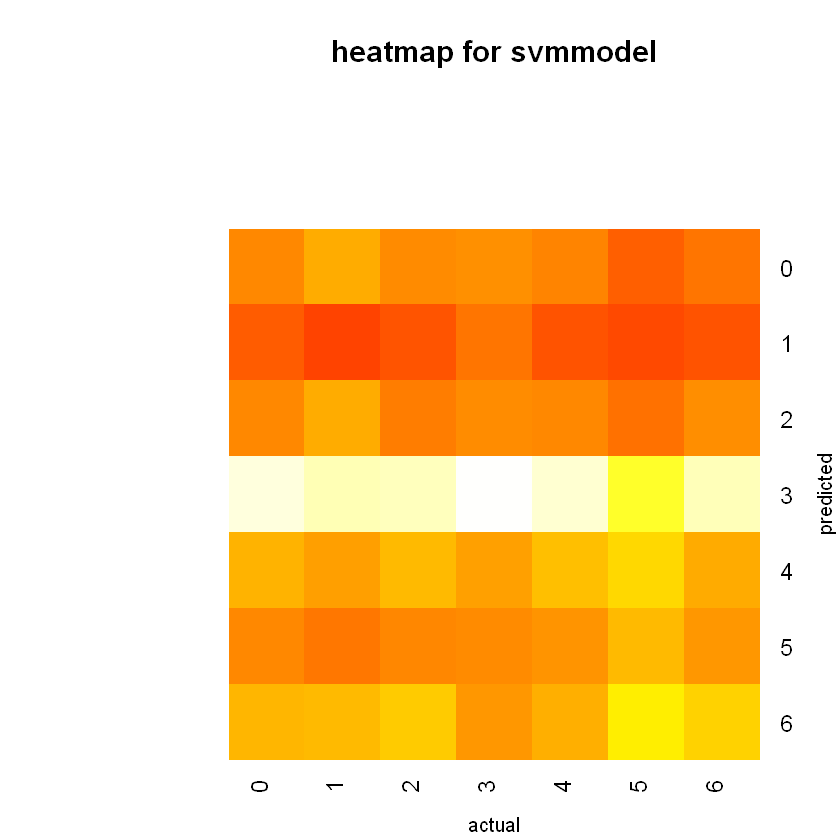

In [101]:
t<-table(pred,testsvmy)
h<-heatmap.2(as.matrix(t),symm=TRUE,scale="column",Rowv=NA,,margin=c(4,4),col=heat.colors(256),
             key=FALSE,trace="none",
          main="heatmap for svmmodel",xlab="actual",ylab=("predicted"))

Multi-class area under the curve: 0.5479


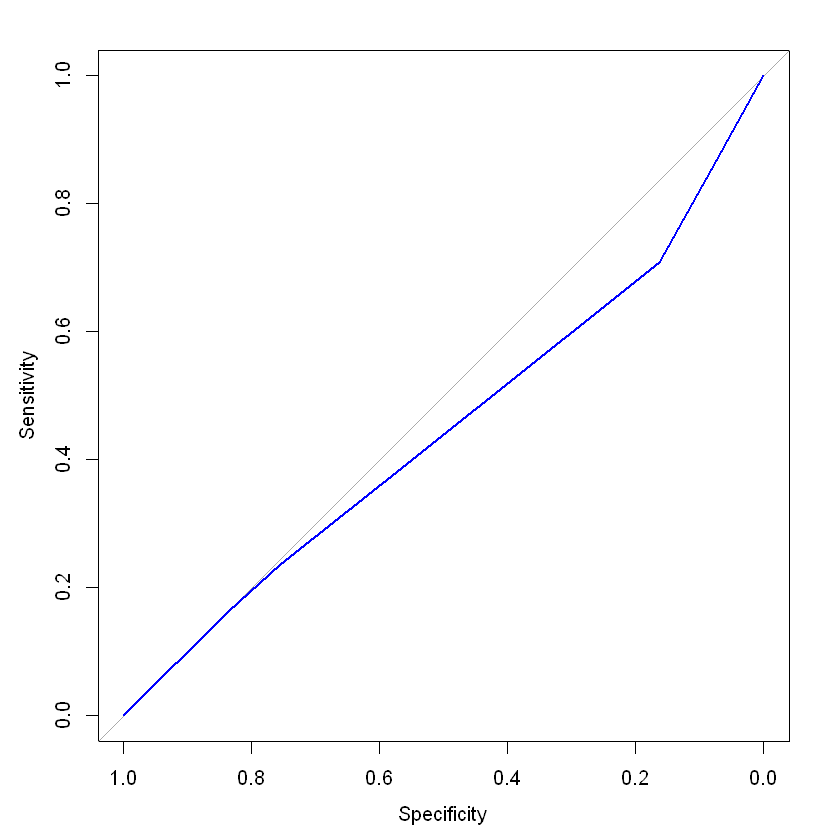

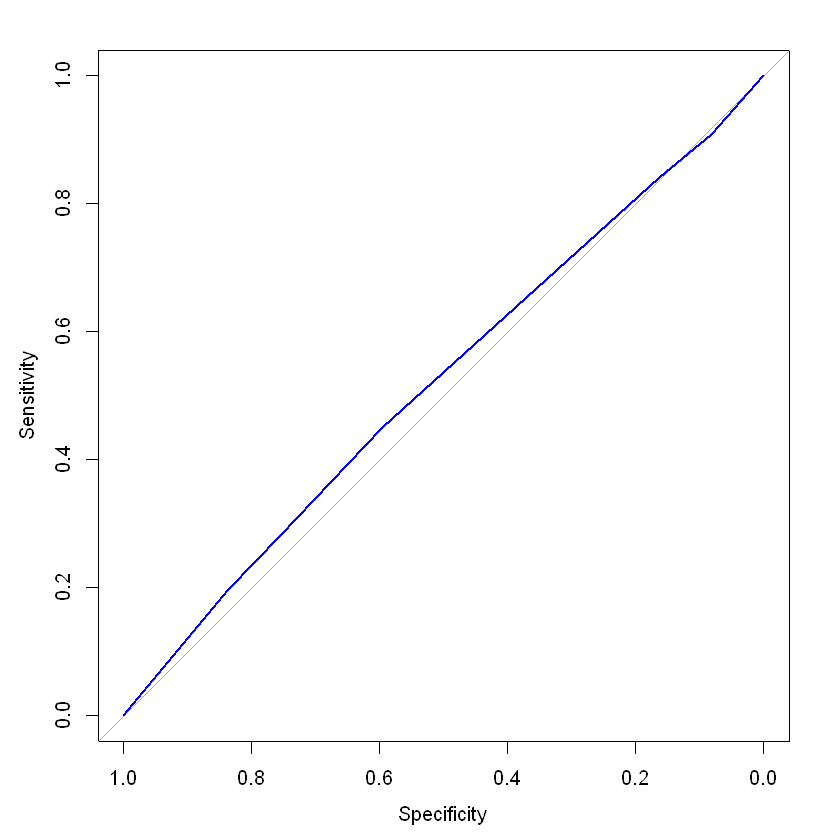

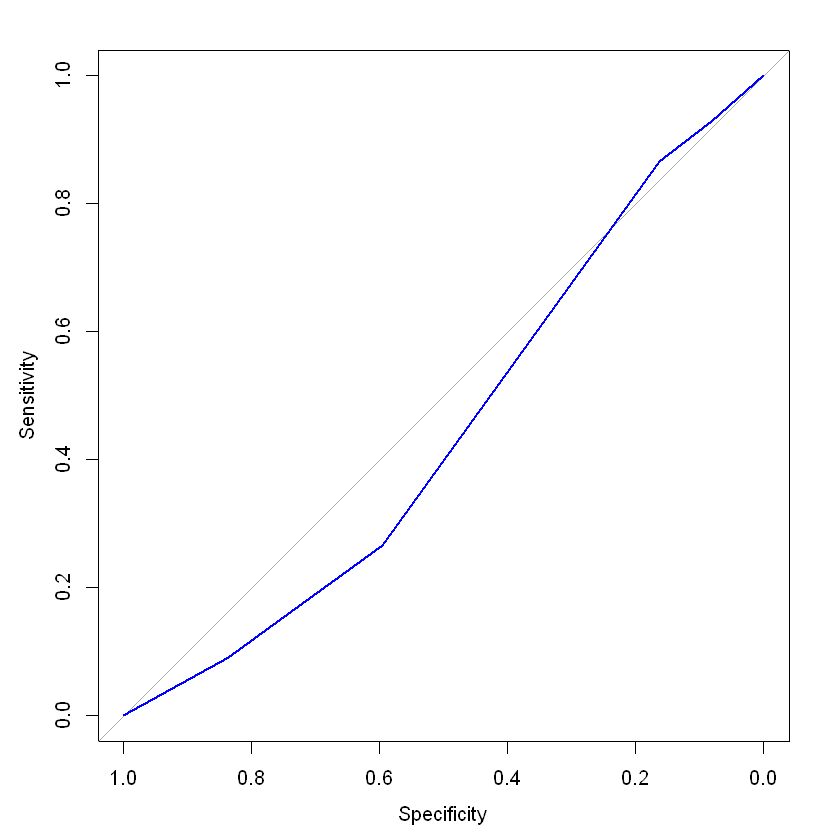

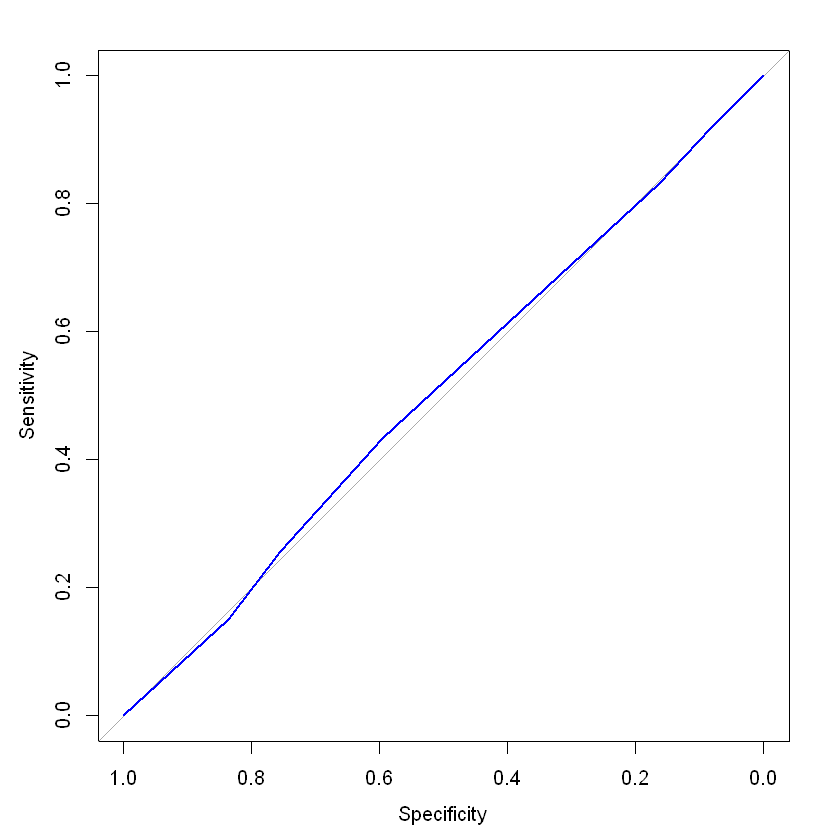

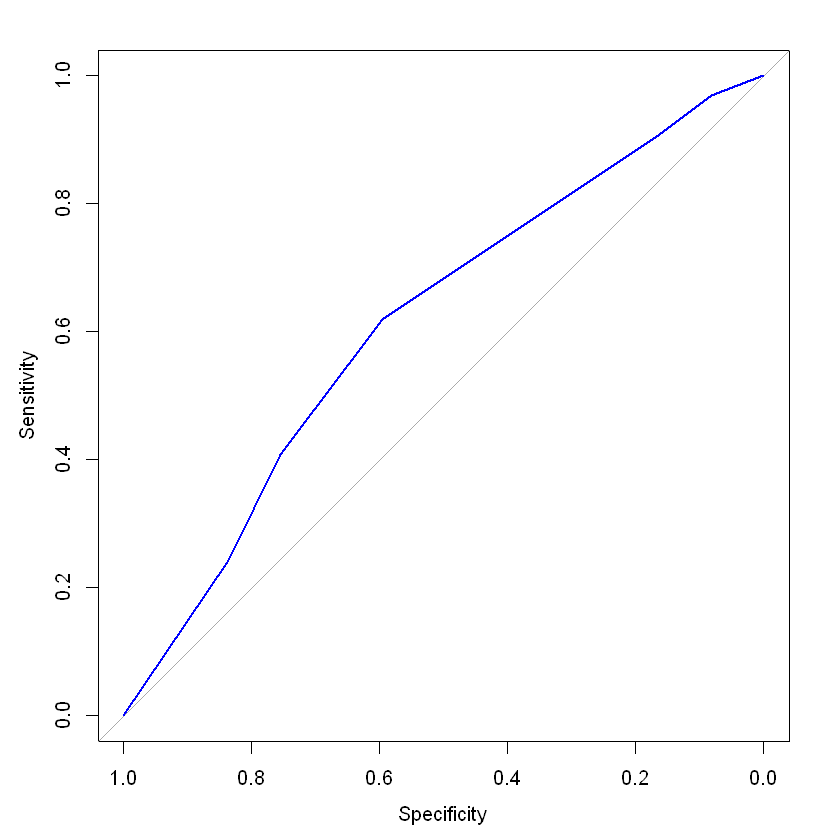

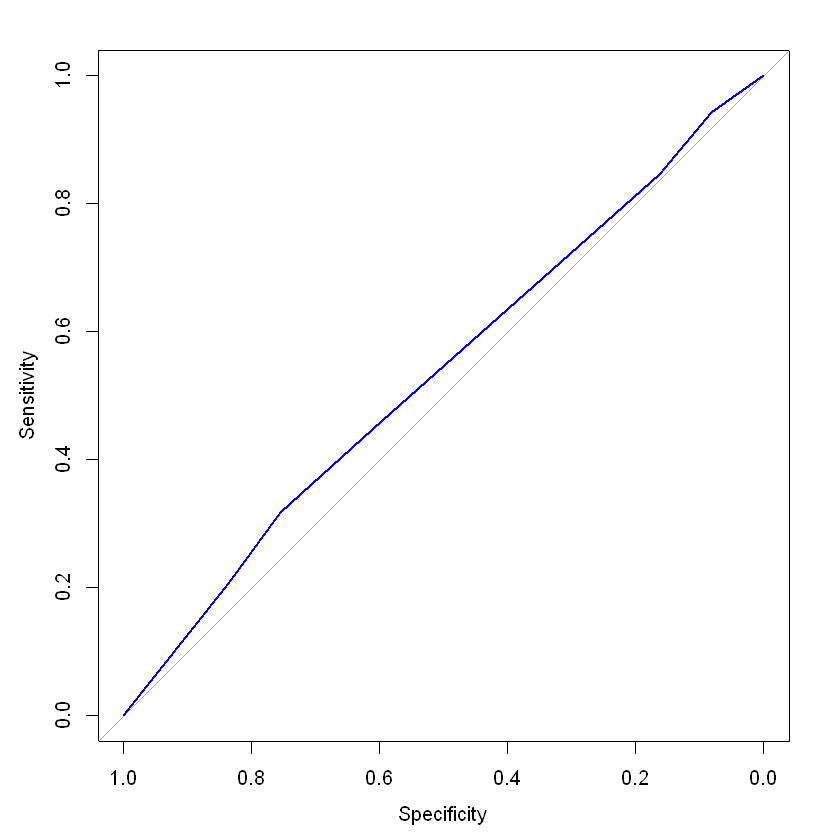

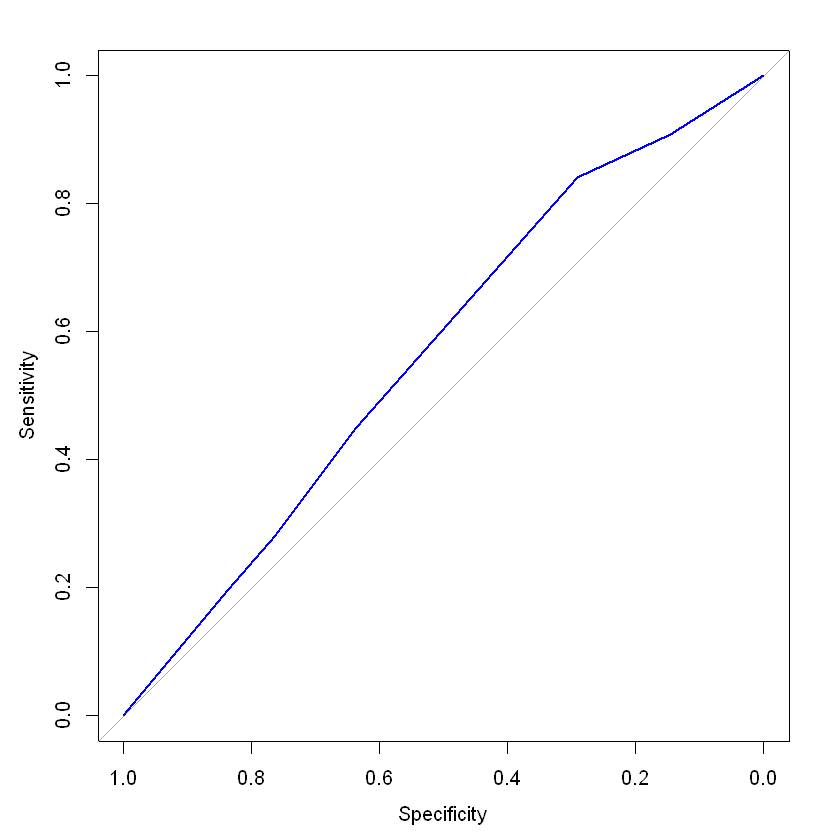

In [121]:
pred<-as.numeric(pred)
m<-multiclass.roc(testsvmy,pred)
print(m$auc)
for(i in (1:7))
{
    plot(m$rocs[[i]],col="blue")
}    

In [10]:
#naive bayes
trainnbx<-as.vector(train_set$pixels)
trainnbx<-paste(trainnbx,collapse=" ")
as.numeric(strsplit(trainnbx,split=" ")[[1]])->trainnbx

In [11]:
trainnbx<-array_reshape(trainnbx,c(28709,2304))
dim(trainnbx)

[1] 28709  2304

In [12]:
pc<-prcomp(trainnbx,center=TRUE,scale.=TRUE)

In [13]:
trainnew<-predict(pc,trainnbx)
trainnew<-trainnew[,1:80]
dim(trainnew)

[1] 28709    80

In [14]:
trainnby<-train_set$emotion
length(trainnby)

[1] 28709

In [15]:
testnbx<-as.vector(test_set$pixels)
testnbx<-paste(testnbx,collapse=" ")
as.numeric(strsplit(testnbx,split=" ")[[1]])->testnbx
testnbx<-array_reshape(testnbx,c(3589,2304))
pct<-prcomp(testnbx,center=TRUE,scale.=TRUE)
testnew<-predict(pct,testnbx)
testnew<-testnew[,1:80]
dim(testnew)

[1] 3589   80

In [16]:
testnby<-test_set$emotion
length(testnby)

[1] 3589

In [20]:
rf<- randomForest(trainnew,trainnby)

In [21]:
prednb<-predict(rf,trainnew)

In [37]:
r<-round(prednb,0)

In [44]:
trainnby<-as.factor(trainnby)
r<-as.factor(r)
conf<-confusionMatrix(r,trainnby)
conf

Confusion Matrix and Statistics

          Reference
Prediction    0    1    2    3    4    5    6
         0  221    0    0    0    0    0    0
         1 3596  115    5    0    1    0    0
         2  174  320 2626    1    7    1    1
         3    4    0 1456 7209  141    5    2
         4    0    1    9    5 4680 1659    8
         5    0    0    1    0    1 1506 4728
         6    0    0    0    0    0    0  226

Overall Statistics
                                          
               Accuracy : 0.5776          
                 95% CI : (0.5719, 0.5833)
    No Information Rate : 0.2513          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4981          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 0 Class: 1 Class: 2 Class: 3 Class: 4 Class: 5
Sensitivity          0.055319 0.263761  0.64096   0.9992   0.9689  0.47493

In [46]:
prednew<-predict(rf,testnew)

In [50]:
r1<-round(prednew,0)
length(r1)

[1] 3589

In [49]:
testnby<-as.factor(testnby)
r1<-as.factor(r1)
conf1<-confusionMatrix(r1,testnby)
conf1

Warning message in levels(reference) != levels(data):
"longer object length is not a multiple of shorter object length"Warning message in confusionMatrix.default(r1, testnby):
"Levels are not in the same order for reference and data. Refactoring data to match."

Confusion Matrix and Statistics

          Reference
Prediction   0   1   2   3   4   5   6
         0   0   0   0   0   0   0   0
         1   0   0   0   0   0   0   0
         2   3   0   2   2   4   0   0
         3 420  48 410 755 479 276 432
         4  68   7 116 122 111 140 194
         5   0   0   0   0   0   0   0
         6   0   0   0   0   0   0   0

Overall Statistics
                                          
               Accuracy : 0.2419          
                 95% CI : (0.2279, 0.2562)
    No Information Rate : 0.2449          
    P-Value [Acc > NIR] : 0.6714          
                                          
                  Kappa : 0.0181          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 0 Class: 1  Class: 2 Class: 3 Class: 4 Class: 5
Sensitivity            0.0000  0.00000 0.0037879   0.8589  0.18687   0.0000
Specificity            1.0000  1.00000 0.9970598   0.

In [58]:
r1<-as.numeric(r1)
m<-multiclass.roc(testnby,r1)
m$auc

Multi-class area under the curve: 0.5433

In [162]:
model %>% load_model_weights_hdf5('weights.h5')

In [164]:
model %>% evaluate(testx,testy)

$loss
[1] 0.9491595

$acc
[1] 0.6503204

In [20]:
model %>% evaluate(tx,ty)

$loss
[1] 0.187925

$acc
[1] 0.9586667

In [170]:
pred<-model%>% predict_classes(testx)
t<-table(Predicted=pred,Actual=test_set$emotion)
t

         Actual
Predicted   0   1   2   3   4   5   6
        0 246   9  45  11  34  12  21
        1   4  26   1   0   2   0   1
        2  57   6 238  13  66  53  35
        3  29   3  34 766  39  24  38
        4  69   7  85  28 305   6  75
        5   5   2  51  15   6 308  11
        6  81   2  74  46 142  13 445

Warning message in heatmap.2(as.matrix(t), symm = TRUE, scale = "column", Rowv = NA, :
"Discrepancy: Rowv is FALSE, while dendrogram is `both'. Omitting row dendogram."Warning message in heatmap.2(as.matrix(t), symm = TRUE, scale = "column", Rowv = NA, :
"Discrepancy: Colv is FALSE, while dendrogram is `column'. Omitting column dendogram."

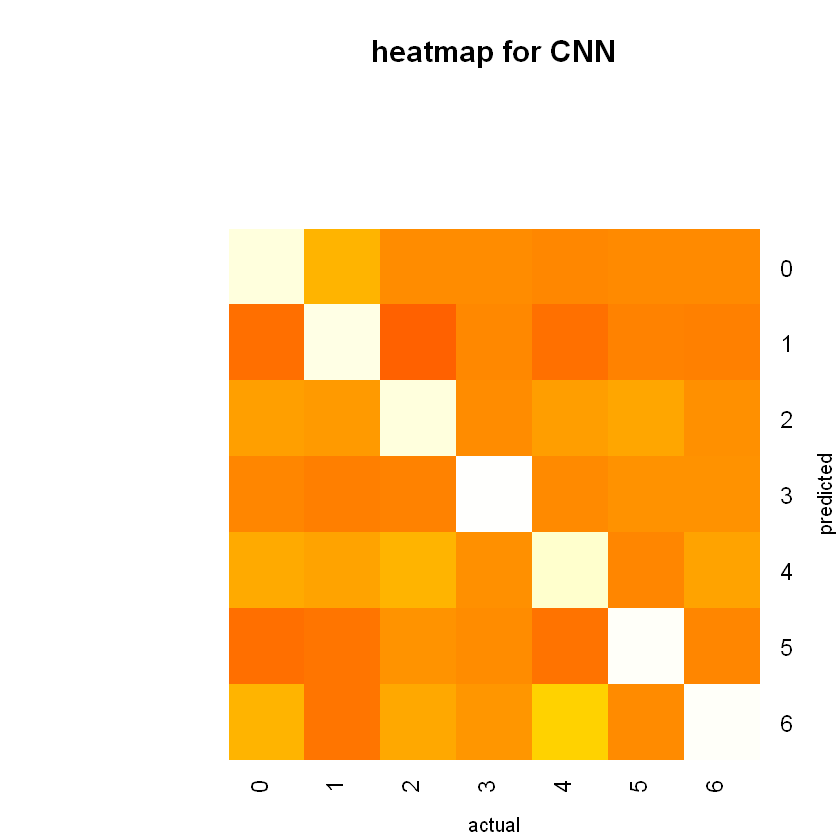

In [171]:
h<-heatmap.2(as.matrix(t),symm=TRUE,scale="column",Rowv=NA,,margin=c(4,4),col=heat.colors(256),
             key=FALSE,trace="none",
          main="heatmap for CNN",xlab="actual",ylab=("predicted"))

Multi-class area under the curve: 0.7403


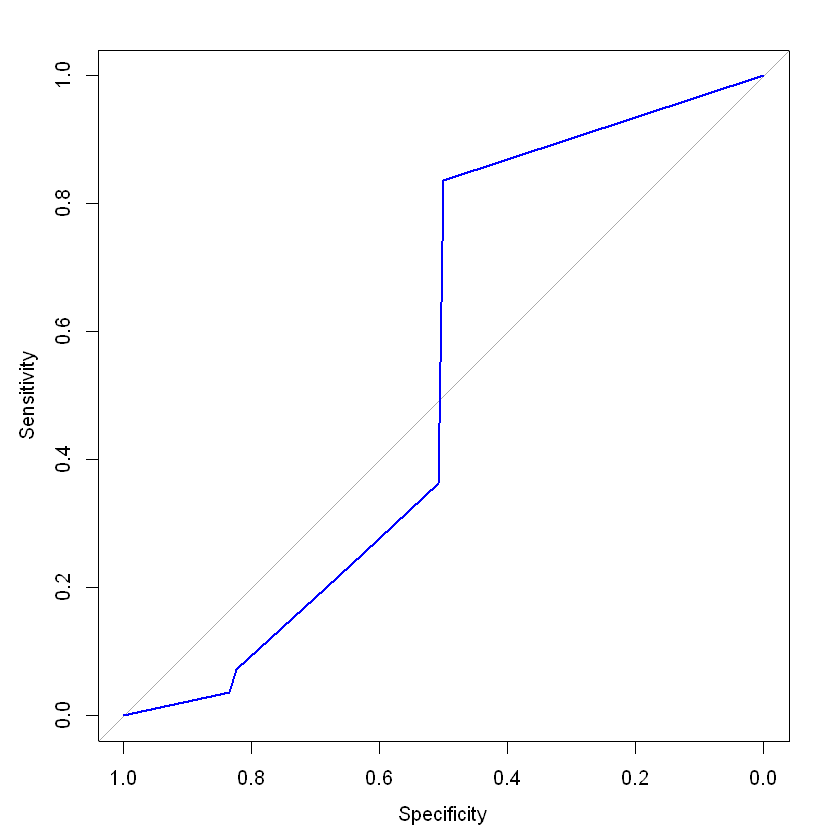

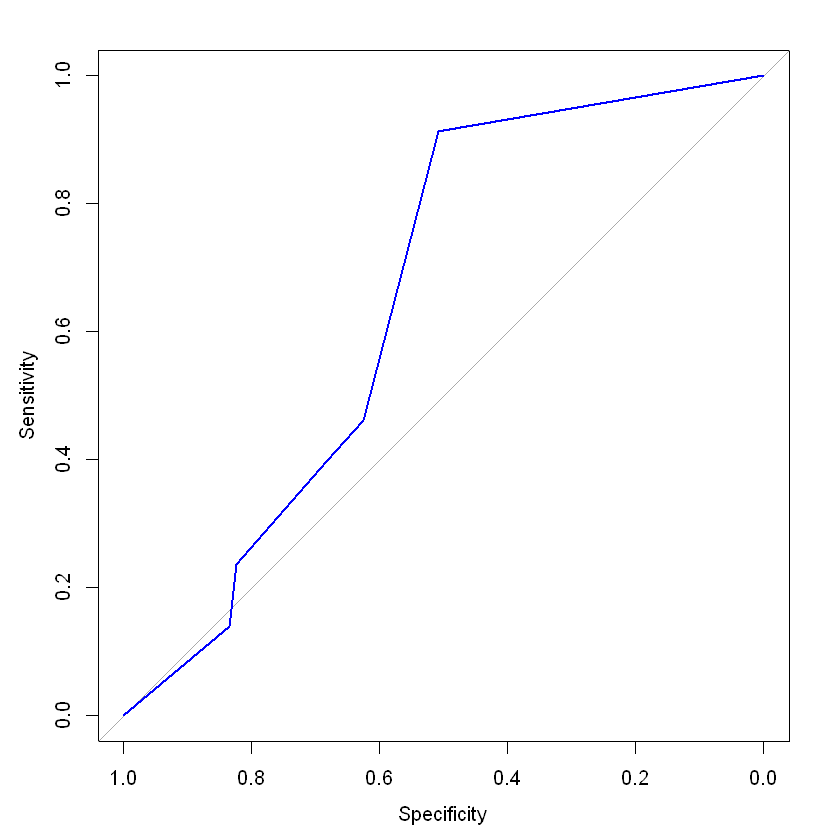

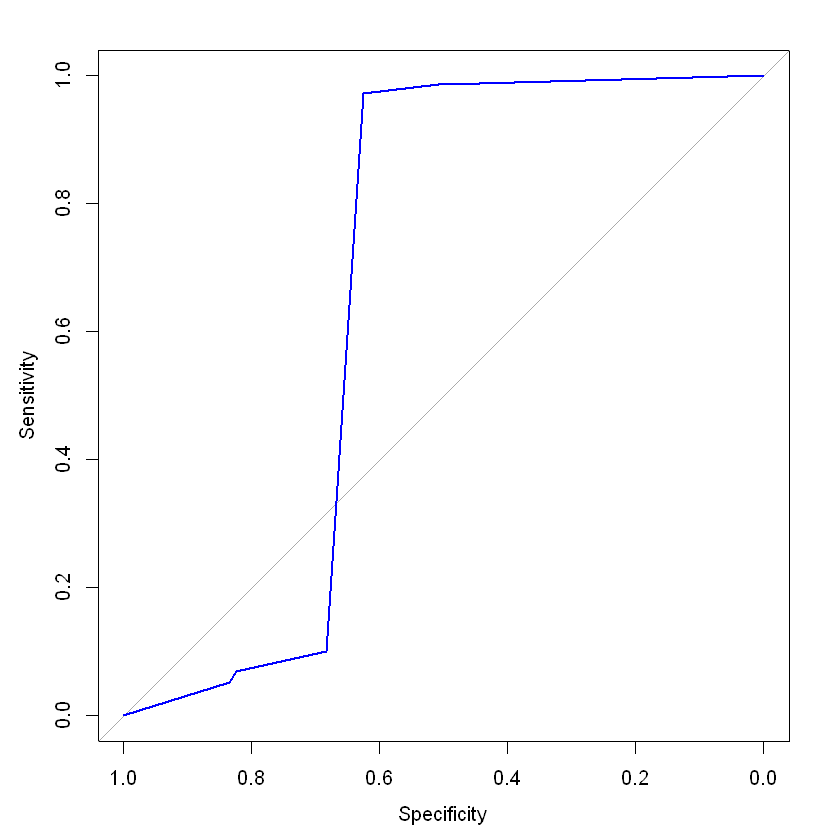

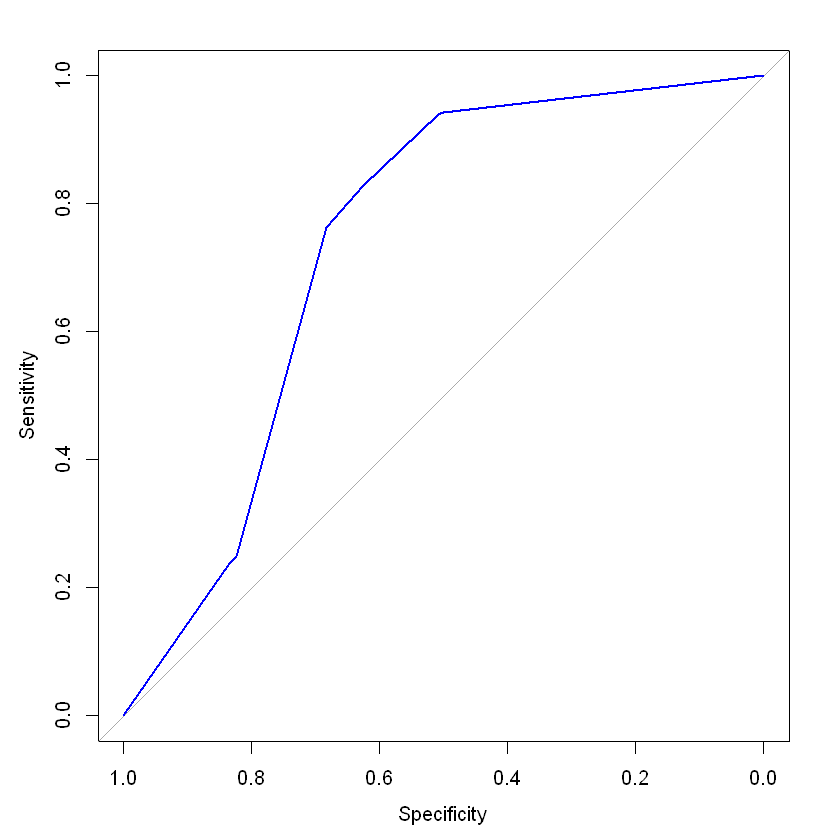

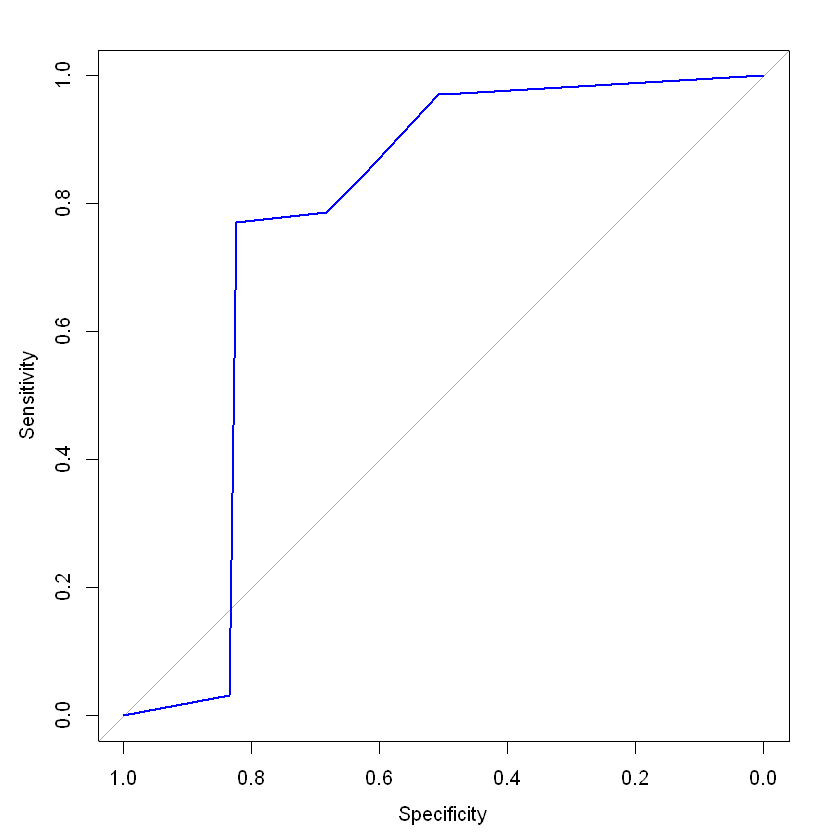

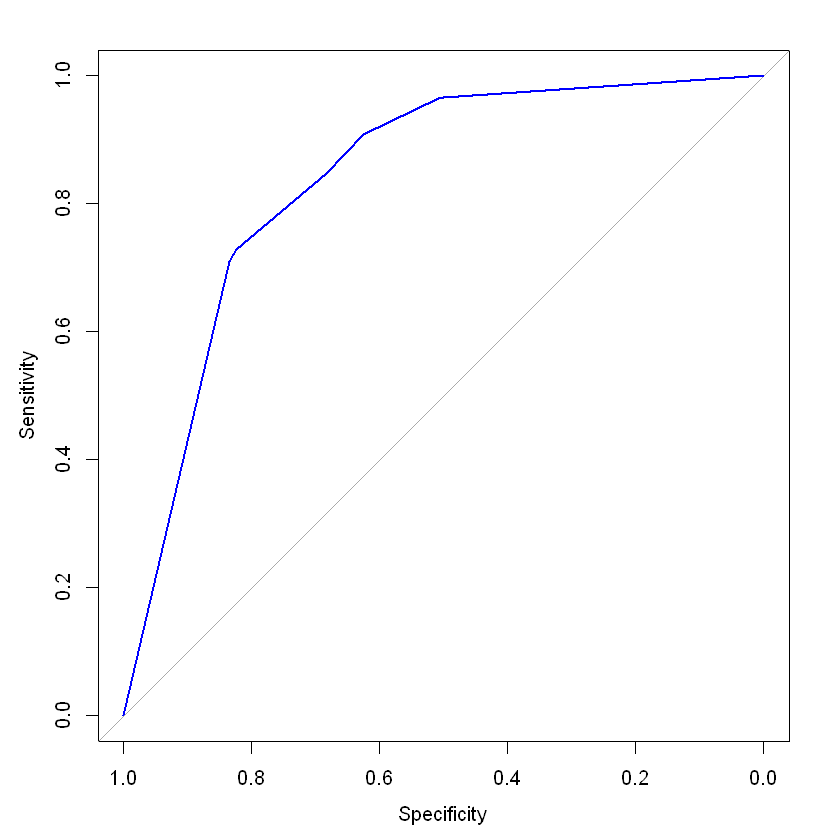

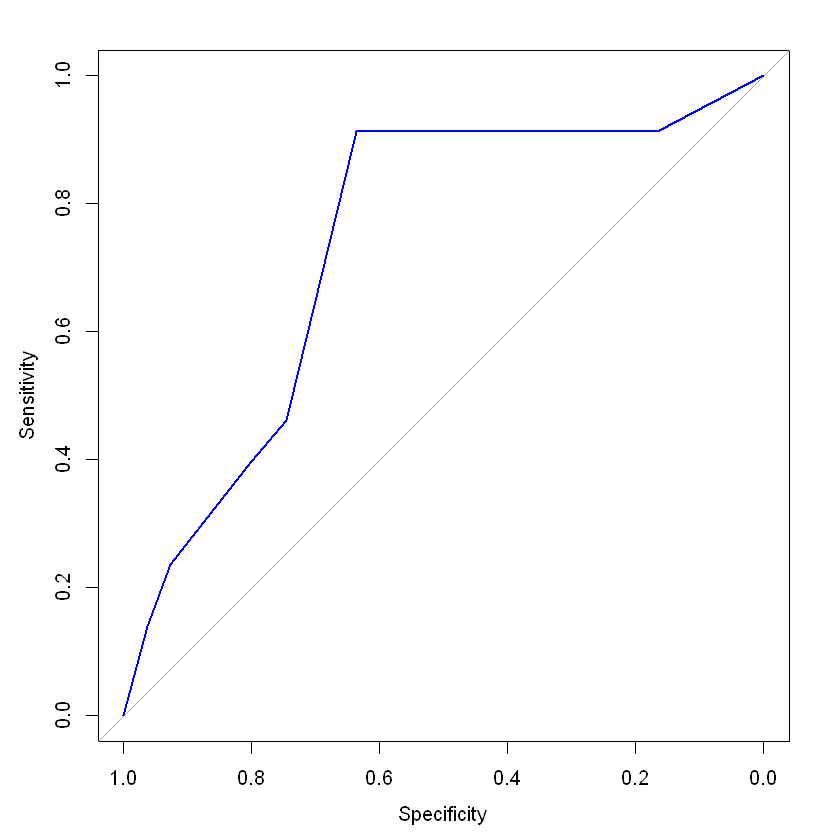

In [176]:
pred<-as.numeric(pred)
m<-multiclass.roc(test_set$emotion,pred)
print(m$auc)
for(i in (1:7))
{
    plot(m$rocs[[i]],col="blue")
}    